In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv('/content/drive/MyDrive/Highway.pcap_Flow.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = df.dropna()

In [ ]:
df= df.drop(['Flow ID' , 'Dst IP' , 'Timestamp' ,'Label'] , axis=1)

In [ ]:
df.rename({'Src IP':'Label'} , axis=1 , inplace=True)

In [ ]:
df['Label'] = ["DoS attack" if x=="192.168.0.8"
               else "DoS attack" if x=="192.168.0.6"
               else "DoS attack" if x=="192.168.0.7"
               else "Benign" for x in df['Label']]

In [ ]:
df['Label'].value_counts()

DoS attack    681564
Benign         66129
Name: Label, dtype: int64

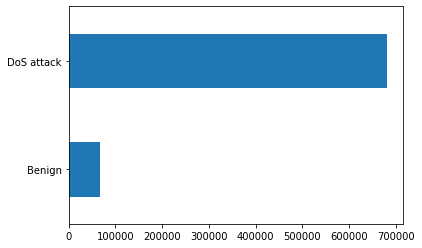

In [ ]:
df['Label'].value_counts(ascending=True).plot(kind='barh')

In [ ]:
numeric_features = df.dtypes[df.dtypes!='object'].index

df[numeric_features]

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,50360,139,6,10757855,11,10,1001.0,970.0,242.0,0.0,...,8,0,184542.0,0.000000,184542.0,184542.0,1.056323e+07,0.000000e+00,10563228.0,10563228.0
1,50360,139,6,3928,0,2,0.0,0.0,0.0,0.0,...,0,0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
2,50361,139,6,10710506,11,11,983.0,1115.0,218.0,0.0,...,9,0,121291.0,0.000000,121291.0,121291.0,1.056354e+07,0.000000e+00,10563539.0,10563539.0
3,50372,443,6,2883069,8,11,1517.0,3779.0,1183.0,0.0,...,3,0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
4,50368,443,6,10201033,1,3,0.0,0.0,0.0,0.0,...,0,0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747690,27249,80,6,47419963,1,5,0.0,0.0,0.0,0.0,...,0,0,716.0,0.000000,716.0,716.0,4.741878e+07,0.000000e+00,47418779.0,47418779.0
747691,41569,80,17,72488445,4,1,0.0,0.0,0.0,0.0,...,0,0,0.0,0.000000,0.0,0.0,1.812211e+07,1.291457e+07,33749188.0,5200329.0
747692,41570,80,17,72488446,3,1,0.0,0.0,0.0,0.0,...,0,0,0.0,0.000000,0.0,0.0,2.416282e+07,1.234688e+07,33749206.0,10230619.0
747693,41571,80,17,72488890,3,1,0.0,0.0,0.0,0.0,...,0,0,0.0,0.000000,0.0,0.0,2.416296e+07,1.234724e+07,33749543.0,10230335.0


In [ ]:
np.where(np.isinf(df[numeric_features]))

(array([ 88311,  88311,  88433,  88433,  88484,  88484,  88505,  88505,
        206735, 206735]), array([16, 17, 16, 17, 16, 17, 16, 17, 16, 17]))

In [ ]:
df[numeric_features] = df[numeric_features].drop(df[numeric_features].index[[88311, 88433, 88484, 88505, 206735]])

In [ ]:
np.where(np.isinf(df[numeric_features]))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:

scaler = QuantileTransformer()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
x , y = df.loc[: , df.columns != 'Label'] , df['Label']
x.dtype

In [ ]:
# Only select rows that have all finite entries
x = x[np.all(np.isfinite(x), axis=1)]
#scaler = StandardScaler()
scaler = QuantileTransformer()
#scaler.fit_transform(x)
df[x] = scaler.fit_transform(df[x])

In [ ]:
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [ ]:
x = x.apply(lambda x: (x*255))

In [ ]:
df0=df[df['Label']=='Benign'].drop(['Label'],axis=1)
df1=df[df['Label']=='DoS attack'].drop(['Label'],axis=1)

In [ ]:
# Generate 79*79 color images for class 0 (BENIGN)
count=0
ims = []

image_path = "train/0/"
os.makedirs(image_path)

for i in range(0, len(df0)):
    count=count+1
    if count<=237:
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 79*79 color images for class 1 (DoS attack)
count=0
ims = []

image_path = "train/1/"
os.makedirs(image_path)

for i in range(0, len(df1)):
    count=count+1
    if count<=237:
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

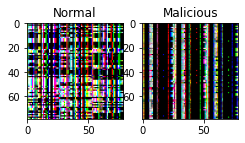

In [ ]:
# Read the images for each category
img1 = Image.open('./train/0/237.png')
img2 = Image.open('./train/1/237.png')

plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
img1.save('Normal.jpg','JPEG')
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("Malicious")
img2.save('Malicious.jpg','JPEG')
plt.show()  # display it

In [ ]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

3140


In [ ]:
#split a test set from the dataset, train/test size = 70%/30%
Numbers=len(allimgs)//3	#size of test set (30%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)
        if not os.path.exists(fpath):
            os.makedirs(fpath)
        shutil.move(srcfile,dstfile)

In [ ]:
# The size of test set
Numbers

1046

In [ ]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')


Finish creating test set


In [ ]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [ ]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [ ]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing


In [ ]:
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
import keras.callbacks as kcallbacks
import keras
#from keras.preprocessing.image import load_img,img_to_array
import math
import random
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
#"categorical": 2D output (aka. list of numbers of length N), [0, 0, 1, 0], which is a one-hot encoding (only one number is 1/ "hot") representing the donkey. This is for mutually exclusive labels
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 2094 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [ ]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_accuracy = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_accuracy['batch'].append(logs.get('val_accuracy'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_accuracy['epoch'].append(logs.get('val_accuracy'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        #plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_accuracy[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.savefig('diagram.jpg')
        plt.show()
        #plt.savefig('diagram.jpg')

In [ ]:
history_this= LossHistory()

In [ ]:
def cnn_by_own(input_shape,num_class,epochs,savepath='./model_own.h5'):
    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.4))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_accuracy', patience=8, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[saveBestModel,history_this],
    )

Epoch 1/10
 6/17 [=========>....................] - ETA: 6s - loss: 0.4842 - accuracy: 0.7773

17/17 [==============================] - ETA: 0s - loss: 0.3760 - accuracy: 0.8634
Epoch 1: val_accuracy improved from -inf to 0.90631, saving model to ./model_own.h5
17/17 [==============================] - 16s 889ms/step - loss: 0.3760 - accuracy: 0.8634 - val_loss: 0.2978 - val_accuracy: 0.9063
Epoch 2/10
17/17 [==============================] - ETA: 0s - loss: 0.2713 - accuracy: 0.9145
Epoch 2: val_accuracy did not improve from 0.90631
17/17 [==============================] - 14s 790ms/step - loss: 0.2713 - accuracy: 0.9145 - val_loss: 0.2523 - val_accuracy: 0.9063
Epoch 3/10
17/17 [==============================] - ETA: 0s - loss: 0.2010 - accuracy: 0.9145
Epoch 3: val_accuracy did not improve from 0.90631
17/17 [==============================] - 14s 810ms/step - loss: 0.2010 - accuracy: 0.9145 - val_loss: 0.1759 - val_accuracy: 0.9063
Epoch 4/10
17/17 [==============================] - ETA: 0s - loss: 0.1196 - accuracy: 0.9145
Epoch 4: val_accuracy did not improve from 0.90631
17

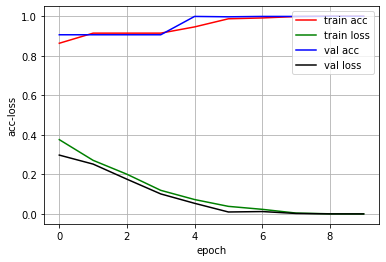

In [ ]:
cnn_by_own(input_shape=INPUT_SIZE,num_class=2,epochs=10)

history_this.loss_plot('epoch')
#history_this.loss_plot('batch')
#fig = plt.figure()
#fig.savefig('figure', dpi = 150)
plt.show()


#plt.savefig('diagram.jpg')
#plt.show

In [ ]:
########################feature importance
df_feature = cnn_by_own.feature_importances_


AttributeError: ignored

In [ ]:
#hyperparameter optimazation
def CNN( num_class,epochs=20,lr=0.001,patience=2, dropout_rate=0.5,verbose=0,activation='relu',optimizer='adam', savepath='./model_own.h5',history=history_this,input_shape=INPUT_SIZE):

    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.4))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_accuracy', patience=8, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,saveBestModel,history_this],
        verbose = verbose
    )
    return hist

In [ ]:
def prediction(CNN_model):
#read images from validation folder
    rootdir = './test_224/'
    test_laels = []
    test_images=[]
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
                continue
            test_laels.append(subdir.split('/')[-1])
            test_images.append(os.path.join(subdir, file))

    predict=[]
    length=len(test_images)
    label=validation_generator.class_indices
    label={v: k for k, v in label.items()}
    for i in range(length):
        inputimg=test_images[i]
        test_batch=[]
        thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
        #print(thisimg)
        test_shape=(1,)+thisimg.shape
        thisimg=thisimg.reshape(test_shape)
        CNN_model_batch=CNN_model.predict(thisimg) #use master model to process the input image
        #generate result by model 1
        prob=CNN_model_batch[0,np.argmax(CNN_model_batch,axis=1)[0]]
        res=label[np.argmax(CNN_model_batch,axis=1)[0]]
        predict.append(res)
    acc=accuracy_score(test_laels,predict)
    return acc

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
#define the objective function to be optimized
import time
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials
import matplotlib.pyplot as plt
import statistics

def objective(params):
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    #activation = activationL[round(activation)]
    #optimizer = optimizerL[round(activation)]

    params = {

        'activation':int(params['activation']),
        'optimizer':int(params['optimizer']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
    activation=params['activation']
    optimizer=params['optimizer']
    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    CNN(num_class=2, epochs=epochs ,patience=patience, lr=lr, dropout_rate=dropout_rate , activation='activation' , optimizer = 'optimizer')

    acc=prediction(CNN_model=load_model('./model_own.h5'))

    print('accuracy:%s'%acc)
    return {'loss': -acc, 'status': STATUS_OK }


In [ ]:
#Hyperparameter optimization by Bayesian optimization - Tree Parzen Estimator
space = {
    'activation': hp.uniform('activation',0,9),
    'optimizer': hp.uniform('optimizer',0,7),
    'epochs': hp.quniform('epochs', 5, 21, 5),
    'patience': hp.quniform('patience', 2, 4, 1),
    'lr': hp.quniform('lr', 0.001, 0.006, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.3, 0.6, 0.1),
}

t1=time.time()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=8)

print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print("Time: "+str(t2-t1))


Epoch 1: val_accuracy improved from -inf to 0.90535, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.90535


Epoch 3: val_accuracy improved from 0.90535 to 0.97897, saving model to ./model_own.h5


Epoch 4: val_accuracy did not improve from 0.97897


Epoch 5: val_accuracy did not improve from 0.97897


Epoch 6: val_accuracy improved from 0.97897 to 0.99618, saving model to ./model_own.h5


Epoch 7: val_accuracy improved from 0.99618 to 0.99904, saving model to ./model_own.h5


Epoch 8: val_accuracy did not improve from 0.99904


Epoch 9: val_accuracy did not improve from 0.99904


Epoch 10: val_accuracy did not improve from 0.99904

1/1 [==============================] - 0s 441ms/step

1/1 [==============================] - 0s 31ms/step

1/1 [==============================] - 0s 36ms/step

1/1 [==============================] - 0s 26ms/step

1/1 [==============================] - 0s 24ms/step

1/1 [==============================] - 0s 27ms/step

1/1 [====


Epoch 1: val_accuracy improved from -inf to 0.90535, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.90535


Epoch 3: val_accuracy did not improve from 0.90535


Epoch 4: val_accuracy improved from 0.90535 to 0.91205, saving model to ./model_own.h5


Epoch 5: val_accuracy improved from 0.91205 to 0.99713, saving model to ./model_own.h5


Epoch 6: val_accuracy did not improve from 0.99713


Epoch 7: val_accuracy did not improve from 0.99713


Epoch 8: val_accuracy did not improve from 0.99713


Epoch 9: val_accuracy did not improve from 0.99713


Epoch 10: val_accuracy did not improve from 0.99713


Epoch 11: val_accuracy did not improve from 0.99713


Epoch 12: val_accuracy improved from 0.99713 to 1.00000, saving model to ./model_own.h5


Epoch 13: val_accuracy did not improve from 1.00000


Epoch 14: val_accuracy did not improve from 1.00000


Epoch 15: val_accuracy did not improve from 1.00000

1/1 [==============================] - 0s 101ms/step

1/1 


Epoch 1: val_accuracy improved from -inf to 0.90535, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.90535


Epoch 3: val_accuracy improved from 0.90535 to 0.99618, saving model to ./model_own.h5


Epoch 4: val_accuracy did not improve from 0.99618


Epoch 5: val_accuracy did not improve from 0.99618


Epoch 6: val_accuracy did not improve from 0.99618


Epoch 7: val_accuracy improved from 0.99618 to 0.99904, saving model to ./model_own.h5


Epoch 8: val_accuracy did not improve from 0.99904


Epoch 9: val_accuracy did not improve from 0.99904


Epoch 10: val_accuracy did not improve from 0.99904


Epoch 11: val_accuracy did not improve from 0.99904


Epoch 12: val_accuracy did not improve from 0.99904


Epoch 13: val_accuracy did not improve from 0.99904


Epoch 14: val_accuracy did not improve from 0.99904


Epoch 15: val_accuracy did not improve from 0.99904

Epoch 15: early stopping

1/1 [==============================] - 0s 112ms/step

1/1 [=========


Epoch 1: val_accuracy improved from -inf to 0.90535, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.90535


Epoch 3: val_accuracy did not improve from 0.90535


Epoch 4: val_accuracy improved from 0.90535 to 0.99522, saving model to ./model_own.h5


Epoch 5: val_accuracy improved from 0.99522 to 0.99904, saving model to ./model_own.h5


Epoch 6: val_accuracy did not improve from 0.99904


Epoch 7: val_accuracy did not improve from 0.99904


Epoch 8: val_accuracy did not improve from 0.99904


Epoch 9: val_accuracy did not improve from 0.99904


Epoch 10: val_accuracy did not improve from 0.99904

1/1 [==============================] - 0s 100ms/step

1/1 [==============================] - 0s 45ms/step

1/1 [==============================] - 0s 30ms/step

1/1 [==============================] - 0s 34ms/step

1/1 [==============================] - 0s 24ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 24m


Epoch 1: val_accuracy improved from -inf to 0.90535, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.90535


Epoch 3: val_accuracy did not improve from 0.90535


Epoch 4: val_accuracy improved from 0.90535 to 0.99904, saving model to ./model_own.h5


Epoch 5: val_accuracy did not improve from 0.99904


Epoch 6: val_accuracy did not improve from 0.99904


Epoch 7: val_accuracy did not improve from 0.99904


Epoch 8: val_accuracy did not improve from 0.99904


Epoch 9: val_accuracy did not improve from 0.99904


Epoch 10: val_accuracy did not improve from 0.99904

1/1 [==============================] - 0s 98ms/step

1/1 [==============================] - 0s 25ms/step

1/1 [==============================] - 0s 29ms/step

1/1 [==============================] - 0s 29ms/step

1/1 [==============================] - 0s 31ms/step

1/1 [==============================] - 0s 29ms/step

1/1 [==============================] - 0s 36ms/step

1/1 [========================


Epoch 1: val_accuracy improved from -inf to 0.90535, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.90535


Epoch 3: val_accuracy improved from 0.90535 to 0.97419, saving model to ./model_own.h5


Epoch 4: val_accuracy improved from 0.97419 to 0.99426, saving model to ./model_own.h5


Epoch 5: val_accuracy did not improve from 0.99426


Epoch 6: val_accuracy did not improve from 0.99426


Epoch 7: val_accuracy improved from 0.99426 to 0.99713, saving model to ./model_own.h5


Epoch 8: val_accuracy did not improve from 0.99713


Epoch 9: val_accuracy improved from 0.99713 to 0.99904, saving model to ./model_own.h5


Epoch 10: val_accuracy improved from 0.99904 to 1.00000, saving model to ./model_own.h5


Epoch 11: val_accuracy did not improve from 1.00000


Epoch 12: val_accuracy did not improve from 1.00000


Epoch 13: val_accuracy did not improve from 1.00000


Epoch 14: val_accuracy did not improve from 1.00000


Epoch 15: val_accuracy did not improve 


Epoch 1: val_accuracy improved from -inf to 0.90535, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.90535


Epoch 3: val_accuracy improved from 0.90535 to 0.91205, saving model to ./model_own.h5


Epoch 4: val_accuracy improved from 0.91205 to 0.99713, saving model to ./model_own.h5


Epoch 5: val_accuracy did not improve from 0.99713


Epoch 6: val_accuracy did not improve from 0.99713


Epoch 7: val_accuracy did not improve from 0.99713


Epoch 8: val_accuracy did not improve from 0.99713


Epoch 9: val_accuracy did not improve from 0.99713


Epoch 10: val_accuracy did not improve from 0.99713


Epoch 11: val_accuracy improved from 0.99713 to 0.99809, saving model to ./model_own.h5


Epoch 12: val_accuracy did not improve from 0.99809


Epoch 13: val_accuracy did not improve from 0.99809


Epoch 14: val_accuracy improved from 0.99809 to 1.00000, saving model to ./model_own.h5


Epoch 15: val_accuracy did not improve from 1.00000

1/1 [=================


Epoch 1: val_accuracy improved from -inf to 0.90535, saving model to ./model_own.h5


Epoch 2: val_accuracy did not improve from 0.90535


Epoch 3: val_accuracy did not improve from 0.90535


Epoch 4: val_accuracy improved from 0.90535 to 0.97132, saving model to ./model_own.h5


Epoch 5: val_accuracy improved from 0.97132 to 0.99904, saving model to ./model_own.h5


Epoch 6: val_accuracy did not improve from 0.99904


Epoch 7: val_accuracy did not improve from 0.99904


Epoch 8: val_accuracy did not improve from 0.99904


Epoch 9: val_accuracy did not improve from 0.99904


Epoch 10: val_accuracy improved from 0.99904 to 1.00000, saving model to ./model_own.h5


Epoch 11: val_accuracy did not improve from 1.00000


Epoch 12: val_accuracy did not improve from 1.00000


Epoch 13: val_accuracy did not improve from 1.00000


Epoch 14: val_accuracy did not improve from 1.00000


Epoch 15: val_accuracy did not improve from 1.00000

1/1 [==============================] - 0s 109ms/step

1/1 

In [ ]:
#compute other parameters
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict

In [ ]:
#generate images from train set and validation set
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128
test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 1046 images belonging to 2 classes.


In [ ]:
#generate labels indicating disease (1) or normal (0)
label=validation_generator.class_indices
label={v: k for k, v in label.items()}

In [ ]:
print(label)

{0: '0', 1: '1'}


In [ ]:
#read images from validation folder
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))

print(test_laels[0],test_images[0])

0 ./test_224/0/38555.png


In [ ]:
#load model 1: CNN
CNN_model=load_model('./model_own.h5')

1/1 [==============================] - 0s 194ms/step
Predicted result for the first image: 0
Confidence level: 0.9656642


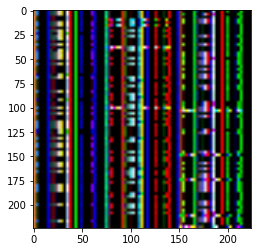

In [ ]:
#Single image prediction
import cv2
import matplotlib.pyplot as plt
test=cv2.imread(test_images[0])

img_show=test[:,:,[2,1,0]]
test=test/255.
test_shape=(1,)+test.shape
test=test.reshape(test_shape)

res=CNN_model.predict(test)

prob=res[0,np.argmax(res,axis=1)[0]]
res=label[np.argmax(res,axis=1)[0]]
print('Predicted result for the first image: %s'%res)
print('Confidence level: %s'%prob)
plt.imshow(img_show)
plt.show()

In [ ]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)

    CNN_model_batch=CNN_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=CNN_model_batch[0,np.argmax(CNN_model_batch,axis=1)[0]]
    res=label[np.argmax(CNN_model_batch,axis=1)[0]]
    predict.append(res)



In [ ]:
#print('prediction time is : %f seconds' % (t3-t2))

prediction time is : 0.056915 seconds


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('CNN accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict ))
target_names = ['0', '1']
print(classification_report(test_laels, predict , target_names=target_names , digits=5 ))

CNN accuracy: 0.997131931166348
precision: 0.9971408290014058
recall: 0.997131931166348
f1: 0.9971074379428281
[[ 79   3]
 [  0 964]]
              precision    recall  f1-score   support

           0    1.00000   0.96341   0.98137        82
           1    0.99690   1.00000   0.99845       964

    accuracy                        0.99713      1046
   macro avg    0.99845   0.98171   0.98991      1046
weighted avg    0.99714   0.99713   0.99711      1046



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_laels, predict)
print(cm)

[[ 134   13]
 [   0 1432]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_laels, predict)
cnf_matrix = cm
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('TPR : ',TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP)
print('TNR : ',TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print('PPV : ',PPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print('FPR : ',FPR)
# False negative rate
FNR = FN/(TP+FN)
print('FNR : ',FNR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('ACC : ',ACC)

TPR :  [0.96341463 1.        ]
TNR :  [1.         0.96341463]
PPV :  [1.         0.99689762]
FPR :  [0.         0.03658537]
FNR :  [0.03658537 0.        ]
ACC :  [0.99713193 0.99713193]
